<a href="https://colab.research.google.com/github/arima35/Belajar-Machine-Learning-untuk-Pemula/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Arief_Indra_Kusuma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [114]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [115]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [116]:
#Type your code here
# Memuat dataset
dataset_path = 'https://raw.githubusercontent.com/arima35/Belajar-Machine-Learning-untuk-Pemula/main/heart.csv'  # Ubah sesuai dengan lokasi file Anda
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())
df.tail()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [117]:
#Type your code here
df.shape

(918, 12)

In [118]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [119]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [120]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


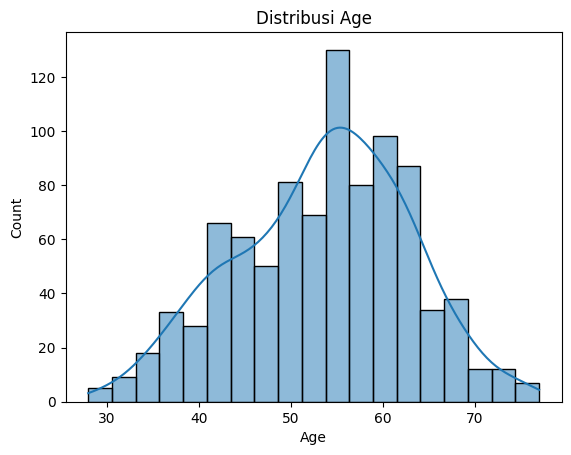

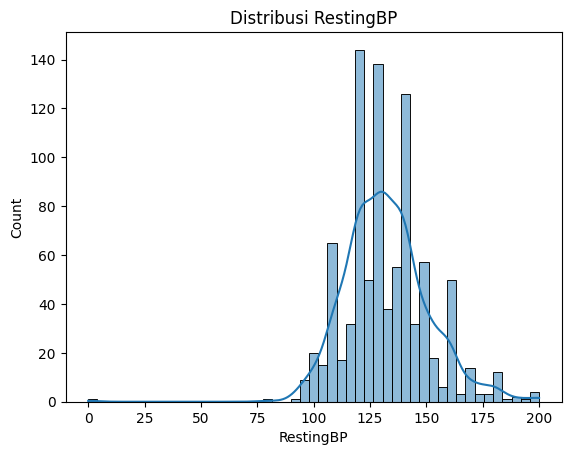

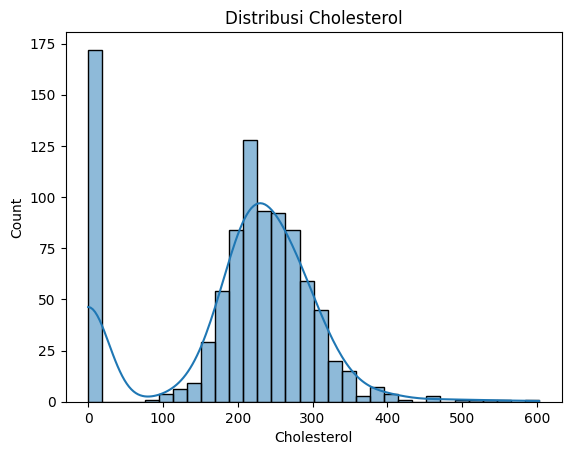

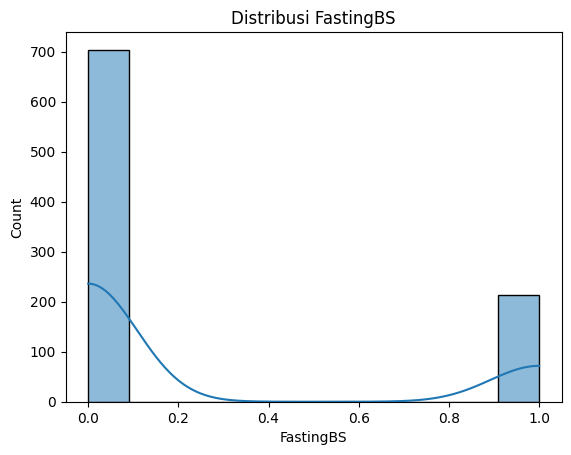

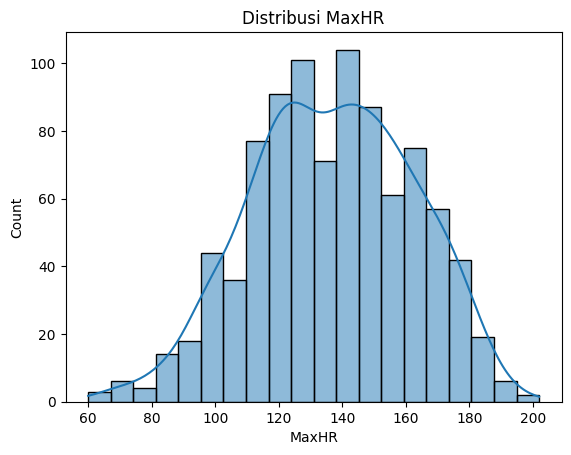

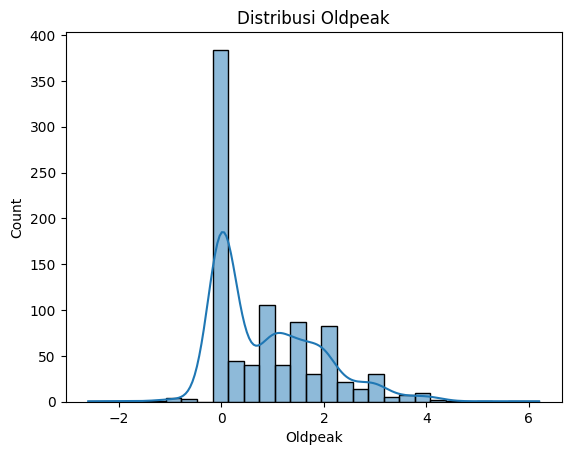

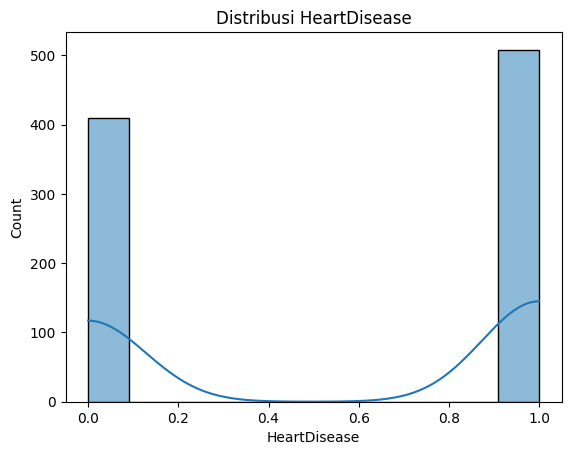

In [121]:
# Visualisasi distribusi data numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [122]:
#Type your code here

In [123]:
# Mengisi missing values untuk kolom numerik dengan mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengisi missing values untuk kolom kategorikal dengan modus
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [124]:
# Encoding kolom kategorikal
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [125]:
# Pisahkan kolom numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Encoding hanya untuk kolom kategorikal
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [126]:
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [127]:
#Type your code here

In [128]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

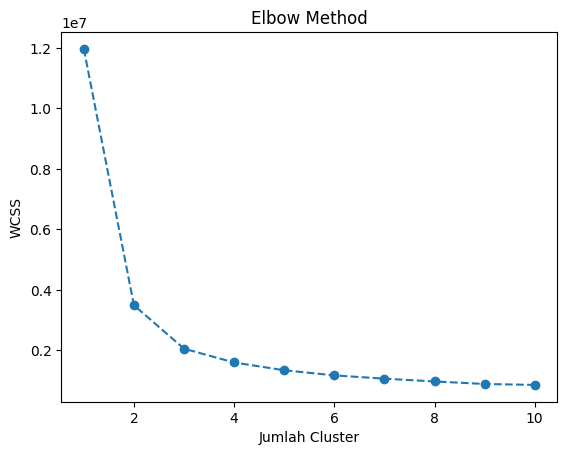

In [129]:
# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [136]:
# Menggunakan Silhouette Score untuk evaluasi
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

In [137]:
# Menentukan jumlah cluster terbaik (misalnya, dari silhouette score maksimal)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [138]:

# Membuat model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [139]:
#Type your code here
# Hitung Silhouette Score untuk model
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score untuk model dengan {optimal_clusters} cluster: {silhouette_avg:.4f}")

Silhouette Score untuk model dengan 2 cluster: 0.6934


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [140]:
#Type your code here
# Menggunakan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_columns])

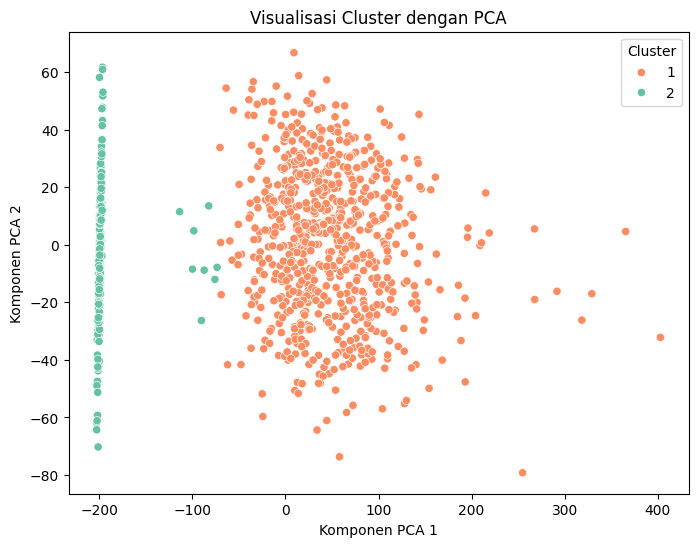

In [143]:
# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster', labels=[str(i) for i in range(1, optimal_clusters + 1)])  # Set legend label dari 1
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [142]:
#Type your code here
# Melihat karakteristik setiap cluster
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())


Karakteristik setiap cluster:

Cluster 0:
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  180.000000  180.000000     180.000000  180.000000   180.000000   
mean    56.394444    0.938889       0.516667  129.505556     4.855556   
std      8.796582    0.240202       0.899876   22.870658    22.737787   
min     32.000000    0.000000       0.000000    0.000000     0.000000   
25%     52.000000    1.000000       0.000000  115.000000     0.000000   
50%     57.500000    1.000000       0.000000  129.000000     0.000000   
75%     62.000000    1.000000       1.000000  140.000000     0.000000   
max     76.000000    1.000000       3.000000  200.000000   126.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  180.000000  180.000000  180.000000      180.000000  180.000000   
mean     0.505556    1.216667  122.211111        0.488889    0.847222   
std      0.501364    0.571922   23.734092        0.501271    1.052023   
min    

In [145]:
# Melihat karakteristik setiap cluster dan membuat keterangan
print("\nKarakteristik setiap cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    # Menampilkan statistik deskriptif
    cluster_description = cluster_data.describe().T  # Transpose agar lebih mudah dibaca
    print(cluster_description)

    # Keterangan berdasarkan statistik
    print("\nKeterangan Cluster:")
    for col in cluster_description.index:
        mean_value = cluster_description.loc[col, 'mean']
        std_value = cluster_description.loc[col, 'std']
        min_value = cluster_description.loc[col, 'min']
        max_value = cluster_description.loc[col, 'max']

        print(f"- {col}: Rata-rata = {mean_value:.2f}, Standar Deviasi = {std_value:.2f}, Min = {min_value}, Max = {max_value}")

    print("\n" + "-"*40)



Karakteristik setiap cluster:

Cluster 0:
                count        mean        std   min    25%     50%    75%  \
Age             180.0   56.394444   8.796582  32.0   52.0   57.50   62.0   
Sex             180.0    0.938889   0.240202   0.0    1.0    1.00    1.0   
ChestPainType   180.0    0.516667   0.899876   0.0    0.0    0.00    1.0   
RestingBP       180.0  129.505556  22.870658   0.0  115.0  129.00  140.0   
Cholesterol     180.0    4.855556  22.737787   0.0    0.0    0.00    0.0   
FastingBS       180.0    0.505556   0.501364   0.0    0.0    1.00    1.0   
RestingECG      180.0    1.216667   0.571922   0.0    1.0    1.00    2.0   
MaxHR           180.0  122.211111  23.734092  60.0  109.0  120.50  138.0   
ExerciseAngina  180.0    0.488889   0.501271   0.0    0.0    0.00    1.0   
Oldpeak         180.0    0.847222   1.052023  -2.6    0.0    0.85    1.5   
ST_Slope        180.0    1.150000   0.602370   0.0    1.0    1.00    2.0   
HeartDisease    180.0    0.877778   0.328456 

Berikut Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan kondisi kesehatan:


---



**Cluster 0**:

- Usia (Age): Rata-rata usia anggota cluster ini adalah 56.39 tahun, dengan standar deviasi 8.80. Usia berkisar antara 32 hingga 76 tahun, menunjukkan bahwa sebagian besar anggota cluster ini berada pada kelompok usia dewasa hingga lansia.

- Jenis Kelamin (Sex): Mayoritas anggota cluster ini adalah laki-laki (rata-rata = 0.94), dengan proporsi kecil perempuan.

- Jenis Nyeri Dada (ChestPainType): Nilai rata-rata chest pain type adalah 0.52, yang menunjukkan bahwa sebagian besar anggota cluster ini memiliki jenis nyeri dada yang lebih rendah (tipe 0 atau 1).

- Tekanan Darah (RestingBP): Rata-rata tekanan darah adalah 129.51 mmHg, dengan rentang antara 0 dan 200, yang menunjukkan adanya beberapa anggota dengan tekanan darah rendah hingga tinggi.

- Kadar Kolesterol (Cholesterol): Rata-rata kolesterol adalah 4.86, yang relatif rendah, dengan beberapa individu memiliki kadar kolesterol yang sangat rendah atau tinggi.

- Fasting Blood Sugar (FastingBS): Rata-rata fasting blood sugar adalah 0.51, yang menunjukkan mayoritas anggota cluster ini memiliki kadar gula darah normal, meskipun ada sebagian yang memiliki kadar gula darah tinggi.

- Elektrokardiogram (RestingECG): Nilai rata-rata 1.22 menunjukkan sebagian besar anggota cluster ini memiliki hasil elektrokardiogram yang normal atau sedikit menunjukkan kelainan ringan.

- Denyut Jantung Maksimal (MaxHR): Rata-rata denyut jantung maksimal adalah 122.21 bpm, yang menunjukkan aktivitas fisik yang moderat atau normal.

- Angin pada Saat Berolahraga (ExerciseAngina): Rata-rata 0.49 menunjukkan hampir setengah anggota cluster ini tidak mengalami angina saat berolahraga.

- Oldpeak: Rata-rata oldpeak adalah 0.85, dengan beberapa nilai negatif yang menunjukkan penurunan ST segment setelah berolahraga, yang mengindikasikan adanya kemungkinan masalah jantung pada sebagian anggota cluster ini.

- ST Slope: Rata-rata 1.15, yang menunjukkan adanya penurunan atau level normal dari ST segment, dengan sedikit kelainan pada sebagian individu.

- Penyakit Jantung (HeartDisease): Rata-rata 0.88, yang mengindikasikan bahwa sebagian besar individu dalam cluster ini memiliki penyakit jantung.

Kesimpulan Cluster 0:

Cluster ini terdiri dari individu yang lebih tua (rata-rata 56.39 tahun) dengan masalah jantung yang lebih sering ditemukan. Mereka juga memiliki tekanan darah, kadar kolesterol, dan tingkat gula darah yang bervariasi, serta sebagian besar menderita penyakit jantung. Dapat disimpulkan bahwa cluster ini cenderung mewakili individu dengan risiko penyakit jantung yang tinggi.

---
**Cluster 1**:

- Usia (Age): Rata-rata usia di cluster ini adalah 52.81 tahun, sedikit lebih muda dibandingkan Cluster 0, dengan rentang usia antara 28 hingga 77 tahun.

- Jenis Kelamin (Sex): Rata-rata jenis kelamin laki-laki adalah 0.75, menunjukkan mayoritas anggota cluster ini adalah laki-laki.

- Jenis Nyeri Dada (ChestPainType): Rata-rata chest pain type adalah 0.85, yang menunjukkan sebagian besar memiliki tipe nyeri dada rendah hingga sedang.

- Tekanan Darah (RestingBP): Rata-rata tekanan darah adalah 133.10 mmHg, menunjukkan tekanan darah normal hingga sedikit tinggi pada sebagian besar individu.

- Kadar Kolesterol (Cholesterol): Rata-rata kadar kolesterol adalah 246.10, lebih tinggi dari cluster 0, dengan kisaran antara 126 hingga 603, yang menunjukkan variabilitas yang cukup besar.

- Fasting Blood Sugar (FastingBS): Rata-rata fasting blood sugar adalah 0.17, yang menunjukkan mayoritas anggota cluster ini memiliki kadar gula darah normal.

- Elektrokardiogram (RestingECG): Rata-rata 0.93, sebagian besar hasil ECG menunjukkan kondisi normal atau sedikit abnormal.

- Denyut Jantung Maksimal (MaxHR): Rata-rata 140.37 bpm, yang menunjukkan aktivitas fisik yang lebih tinggi dibandingkan cluster 0.

- Angin pada Saat Berolahraga (ExerciseAngina): Rata-rata 0.38, lebih rendah dibandingkan cluster 0, menunjukkan lebih sedikit anggota cluster ini yang mengalami angina saat berolahraga.

- Oldpeak: Rata-rata 0.90, dengan beberapa individu yang menunjukkan penurunan ST segment setelah berolahraga, tetapi tidak sebanyak di cluster 0.

- ST Slope: Rata-rata 1.41, yang menunjukkan lebih banyak individu dengan ST segment normal atau sedikit menurun.

- Penyakit Jantung (HeartDisease): Rata-rata 0.47, lebih rendah dibandingkan cluster 0, menunjukkan lebih sedikit individu yang menderita penyakit jantung.

Kesimpulan Cluster 1:

Cluster ini terdiri dari individu yang sedikit lebih muda dengan tekanan darah, kadar kolesterol, dan denyut jantung maksimal yang lebih tinggi dibandingkan cluster 0. Meskipun demikian, prevalensi penyakit jantung di cluster ini lebih rendah, dan sebagian besar anggota tidak mengalami angina saat berolahraga. Ini mengindikasikan bahwa cluster ini mungkin mewakili individu dengan risiko jantung yang lebih rendah meskipun ada beberapa yang masih berisiko.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [146]:
# Menyimpan hasil clustering ke CSV
df.to_csv('hasil_clustering.csv', index=False)
print("\nHasil clustering telah disimpan sebagai 'hasil_clustering.csv'.")


Hasil clustering telah disimpan sebagai 'hasil_clustering.csv'.
